In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score


## Carga y exploración de datos

In [27]:
df = sns.load_dataset("titanic")
df2 = df[["survived", "pclass", "sex", "age", "fare", "sibsp", "parch"]].dropna()
df2.head()

,survived,pclass,sex,age,fare,sibsp,parch
0,0,3,male,22.0,7.2500,1,0
1,1,1,female,38.0,71.2833,1,0
2,1,3,female,26.0,7.9250,0,0
3,1,1,female,35.0,53.1000,1,0
4,0,3,male,35.0,8.0500,0,0


In [28]:
df2["sex"] = df2["sex"].map({"male": 1, "female": 0})

In [29]:
## Proporcion de clases de la variable target
df2['survived'].value_counts() / df2.shape[0]

survived
0    0.593838
1    0.406162
Name: count, dtype: float64

In [30]:
## Matriz de correlacion
correlation_mat = df2.corr(numeric_only=True)
correlation_mat.style.background_gradient(cmap='coolwarm')

,survived,pclass,sex,age,fare,sibsp,parch
survived,1.000000,-0.359653,-0.538826,-0.077221,0.268189,-0.017358,0.093317
pclass,-0.359653,1.000000,0.155460,-0.369226,-0.554182,0.067247,0.025683
sex,-0.538826,0.155460,1.000000,0.093254,-0.184994,-0.103950,-0.246972
age,-0.077221,-0.369226,0.093254,1.000000,0.096067,-0.308247,-0.189119
fare,0.268189,-0.554182,-0.184994,0.096067,1.000000,0.138329,0.205119
sibsp,-0.017358,0.067247,-0.103950,-0.308247,0.138329,1.000000,0.383820
parch,0.093317,0.025683,-0.246972,-0.189119,0.205119,0.383820,1.000000


## Entranamiento del modelo

In [34]:
df_train, df_test = train_test_split(df2, test_size=0.2, random_state=1234, stratify=df2["survived"])

In [36]:
formula = 'survived ~ pclass + sex + age + fare + sibsp + parch'

model = smf.logit(formula=formula, data=df_train).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.444683
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  571
Model:                          Logit   Df Residuals:                      564
Method:                           MLE   Df Model:                            6
Date:                Wed, 05 Mar 2025   Pseudo R-squ.:                  0.3417
Time:                        23:51:26   Log-Likelihood:                -253.91
converged:                       True   LL-Null:                       -385.70
Covariance Type:            nonrobust   LLR p-value:                 5.135e-54
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5786      0.683      8.166      0.000       4.240       6.918
pclass        -1.1719      0.

In [38]:
formula = 'survived ~ pclass + sex + age + fare + sibsp + parch'
#formula = 'survived ~ pclass + sex + age + sibsp '

model = smf.logit(formula=formula, data=df_train).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.445117
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  571
Model:                          Logit   Df Residuals:                      566
Method:                           MLE   Df Model:                            4
Date:                Wed, 05 Mar 2025   Pseudo R-squ.:                  0.3410
Time:                        23:58:19   Log-Likelihood:                -254.16
converged:                       True   LL-Null:                       -385.70
Covariance Type:            nonrobust   LLR p-value:                 9.890e-56
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7116      0.615      9.283      0.000       4.506       6.917
pclass        -1.2264      0.

## Rendimiento del modelo

In [41]:
## predecir con el set de prueba
y_pred_prob = model.predict(df_test)

## Convertir probabilidades en clases (umbral 0.5)
y_pred = (y_pred_prob >= 0.5).astype(int)

In [63]:
## Matriz de confusion y accuracy
conf_matrix = confusion_matrix(df_test["survived"], y_pred)

conf_matrix_df = pd.DataFrame(conf_matrix,  
                              index=["Actual: 0", "Actual: 1"],  
                              columns=["Predicted: 0", "Predicted: 1"])


display(conf_matrix_df)
accuracy = accuracy_score(df_test["survived"], y_pred)
print(f"Accuracy: {accuracy:.4f}")

,Predicted: 0,Predicted: 1
Actual: 0,69,16
Actual: 1,15,43


Accuracy: 0.7832


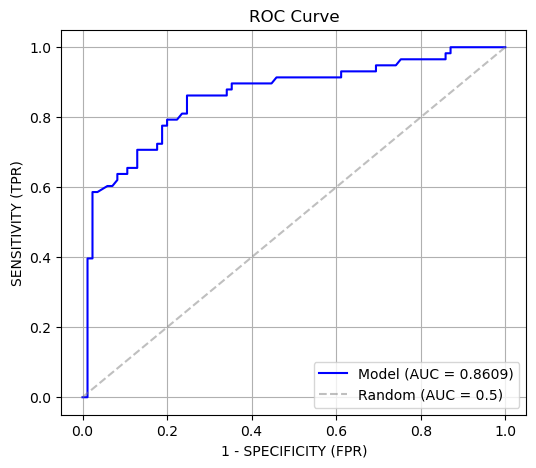

In [59]:
## ROC-AUC
fpr, tpr, _ = roc_curve(df_test["survived"], y_pred_prob)

auc = roc_auc_score(df_test["survived"], y_pred_prob)


plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"Model (AUC = {auc:.4f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", alpha=0.5,color="gray", label="Random (AUC = 0.5)")

plt.xlabel("1 - SPECIFICITY (FPR)")
plt.ylabel("SENSITIVITY (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()